In [1]:
school_name = '浙江省金华市义乌市学雅幼儿园'

In [2]:
#初始化
import sys
sys.path.append(sys.path[0]+"/../..")
from txt2poi import tianditu_api, gaode_api, baidu_api, get_distance_byloc
from txt2poi.model.gjc2wsg import Gcj2Wgs_SimpleIteration

tianditukey = '2423a38b3af5569af8aa521babc5e349'
gaodekey = '6977ecc8c25093a80583a1cb5b2e6155'
baidukey = 'v4YOvobXA6CKDXzW2GjcrxAggIqByx7U'

tianditu = tianditu_api(tianditukey)
gaode = gaode_api(gaodekey)
baidu = baidu_api(baidukey)

In [5]:
#天地图API实现文本-坐标映射
loc_tianditu, result = tianditu.getlocbyname(school_name)
#高德API实现文本-坐标映射
_, loc_gaode, _ = gaode.getloc_byinputtips(school_name)
#百度API实现文本-坐标映射
_, loc_baidu, _ = baidu.getloc_byinputtips(school_name)

#地图展示
tianditu.displaybyloc(loc_tianditu, loc_tianditu, file='t.png', zoom=18)
gaode.displaybyloc(loc_gaode, file='g.png', zoom=18)
baidu.displaybyloc(loc_baidu, loc_baidu, file='b.png', zoom=18)

x, y = Gcj2Wgs_SimpleIteration(loc_gaode[0], loc_gaode[1])
loc_gaoden = (x, y)

x, y = Gcj2Wgs_SimpleIteration(loc_baidu[0], loc_baidu[1])
loc_baidun = (x, y)
print("天地图API: 获取到学校{}的天地图坐标:{}".format(school_name, loc_tianditu))
print("高德API: 获取到学校{}的gcj02ll坐标:{};转换后天地图坐标:{}".format(school_name, loc_gaode, loc_gaoden))
print("百度API: 获取到学校{}的gcj02ll坐标:{};转换后天地图坐标:{}".format(school_name, loc_baidu, loc_baidun))

天地图API: 获取到学校浙江省金华市义乌市学雅幼儿园的天地图坐标:(120.03217, 29.29214)
高德API: 获取到学校浙江省金华市义乌市学雅幼儿园的gcj02ll坐标:(120.037417, 29.289683);转换后天地图坐标:(120.0327356601145, 29.292260435538417)
百度API: 获取到学校浙江省金华市义乌市学雅幼儿园的gcj02ll坐标:(120.03741722921, 29.289683838959);转换后天地图坐标:(120.03273588877968, 29.292261273336013)


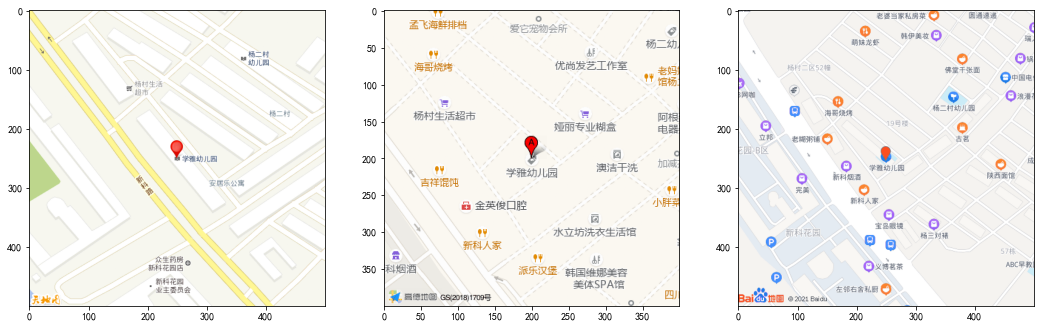

In [4]:
#显示对比标记图
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 18 ,18

# read images
img_A = mpimg.imread('t.png')
img_B = mpimg.imread('g.png')
img_C = mpimg.imread('b.png')

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)